In [2]:
#!pip install google-generativeai

In [3]:
import textwrap

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
    text = text.replace("•", " *")
    return Markdown(textwrap.indent(text,">",predicate=lambda _: True))


In [4]:
import google.generativeai as genai
import os

c:\Users\saksh\OneDrive\Documents\AI_Code_Explainer\myvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
os.environ['GOOGLE_APU_KEY']=""
genai.configure(api_key=os.environ['GOOGLE_APU_KEY'])

In [6]:
list(genai.list_models())

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
      

In [7]:
models = [m for m in genai.list_models() if 'generateContent' in m.supported_generation_methods]
model = models[2].name
print(model)

models/gemini-pro


In [8]:
models

[Model(name='models/gemini-1.0-pro-latest',
       base_model_id='',
       version='001',
       display_name='Gemini 1.0 Pro Latest',
       description=('The best model for scaling across a wide range of tasks. This is the latest '
                    'model.'),
       input_token_limit=30720,
       output_token_limit=2048,
       supported_generation_methods=['generateContent', 'countTokens'],
       temperature=0.9,
       max_temperature=None,
       top_p=1.0,
       top_k=None),
 Model(name='models/gemini-1.0-pro',
       base_model_id='',
       version='001',
       display_name='Gemini 1.0 Pro',
       description='The best model for scaling across a wide range of tasks',
       input_token_limit=30720,
       output_token_limit=2048,
       supported_generation_methods=['generateContent', 'countTokens'],
       temperature=0.9,
       max_temperature=None,
       top_p=1.0,
       top_k=None),
 Model(name='models/gemini-pro',
       base_model_id='',
       version='001',


**Simple Chatbot**

In [9]:
# model = genai.GenerativeModel('gemini-pro')
# prompt = "Why is the Sky blue?"
# response = model.generate_content(prompt)

In [10]:
model = genai.GenerativeModel('gemini-pro')
pp = f"""
def my_func(x):
  if x>5:
    return "High"
  else:
    return "Low"

result = str(my_func(4) + my_func(6) + my_func(4))
print(result)

"""
code_example = f"""
----------------------------
Example 1: Code Snippet
x = 10
def foo():
    global x
    x = 5

foo()
print(x)
Correct output: 5
Code Explaination: Inside the foo function, the global keyword is used to modify the global variable x to be 5.
So, print(x) outside the function print the modfied value is 5.
-----------------------------

Example 2: Code Snippet
def modify_list(input_list):
  input_list.append(4)
  input_list = [1,2,3]
my_list = [0]
modify_list(my_list)
print(my_list)
Correct output: [0, 4]
Code Explaination: Inside the modify_list function, an element 4 is appended to input_list.
Then, input_list is reassigned to a new list [1,2,3], but this change doesn't affeact the original list.
So, print(my_list) outputs [0, 4].
------------------------------
"""


prompt = f"""
Your Task is to act as Code Explainer.
I'll give you a Code Snippet.
Your Job is to explain the Code Snippet step-by-step.
Break down the code into as many steps as possible.
Share intermediate checkpoints & steps along with results.
Few good examples of python code output between #### seperator:
####
{code_example}
####
Code Snippet is shared below, delimited with triple backticks:
```
  {pp}
```
"""
completion = model.generate_content(prompt)

In [11]:
%%time
response = model.generate_content(prompt)

CPU times: total: 0 ns
Wall time: 5.56 s


In [12]:
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [13]:
to_markdown(completion.text)

>### Step 1: Defining the my_func function
>
>The code begins by defining a function named my_func that takes one argument, x. This function returns the string "High" if x is greater than 5, and "Low" otherwise.
>
>```python
>def my_func(x):
>  if x>5:
>    return "High"
>  else:
>    return "Low"
>```
>
>### Step 2: Calling the my_func function
>
>Next, the code calls the my_func function three times, passing in the values 4, 6, and 4 as arguments. The results of these function calls are stored in variables named result1, result2, and result3, respectively.
>
>```python
>result1 = my_func(4)
>result2 = my_func(6)
>result3 = my_func(4)
>```
>
>### Step 3: Concatenating the results
>
>The code then concatenates the three results together into a single string. The + operator is used to concatenate strings in Python.
>
>```python
>result = result1 + result2 + result3
>```
>
>### Step 4: Printing the result
>
>Finally, the code prints the value of the result variable to the console.
>
>```python
>print(result)
>```
>
>### Output:
>
>When the code is run, it produces the following output:
>
>```
>LowLowLow
>```
>
>This is because the value of x is less than 5 in all three of the function calls, so the my_func function returns "Low" each time.

## main


In [14]:
model = genai.GenerativeModel('gemini-pro')
pp = f"""
def func(x):
    if x > 0:
        return x + func(x-1)
    return 0

result = func(5)
print(result)
"""
code_example = f"""
----------------------------
Example 1: Code Snippet
x = 10
def foo():
    global x
    x = 5

foo()
print(x)
Correct output: 5
Code Explaination: Inside the foo function, the global keyword is used to modify the global variable x to be 5.
So, print(x) outside the function print the modfied value is 5.
-----------------------------

Example 2: Code Snippet
def modify_list(input_list):
  input_list.append(4)
  input_list = [1,2,3]
my_list = [0]
modify_list(my_list)
print(my_list)
Correct output: [0, 4]
Code Explaination: Inside the modify_list function, an element 4 is appended to input_list.
Then, input_list is reassigned to a new list [1,2,3], but this change doesn't affeact the original list.
So, print(my_list) outputs [0, 4].
------------------------------
"""


prompt = f"""
Your Task is to act as Code Explainer.
I'll give you a Code Snippet.
Your Job is to explain the Code Snippet step-by-step.
Break down the code into as many steps as possible.
Share intermediate checkpoints & steps along with results.
Few good examples of python code output between #### seperator:
####
{code_example}
####
Code Snippet is shared below, delimited with triple backticks:
```
  {pp}
```
"""
completion = model.generate_content(prompt)

In [15]:
to_markdown(completion.text)


>#### Step 1: Define a function called func that takes one argument, x.
>
>#### Step 2: Inside the func function:
>
>- Check if x is greater than 0.
>  - If x is greater than 0, return x plus the result of a recursive call to func with x-1 as the argument.
>  - If x is not greater than 0, return 0.
>
>#### Step 3: Call the func function with the argument 5 and store the returned result in a variable called result.
>
>#### Step 4: Print the value of result.
>
>#### Checkpoint 1:
>
>```
>def func(x):
>    if x > 0:
>        return x + func(x-1)
>    return 0
>
>func(5)
>```
>
>- The func function is defined with one argument, x.
>- The func function is called with the argument 5.
>
>#### Checkpoint 2:
>
>```
>def func(x):
>    if x > 0:
>        return x + func(x-1)
>    return 0
>
>result = func(5)
>```
>
>- The func function is called with the argument 5 and the result is stored in the variable result.
>
>#### Checkpoint 3:
>
>```
>def func(x):
>    if x > 0:
>        return x + func(x-1)
>    return 0
>
>result = func(5)
>print(result)
>```
>
>- The value of result is printed to the console.
>
>#### Final Result:
>
>```
>15
>```

**algorithm**


In [16]:
model = genai.GenerativeModel('gemini-pro')
Code_Snippet = f"""
def func(x):
    if x > 0:
        return x + func(x-1)
    return 0

result = func(5)
print(result)
"""
python_code_example = f"""
----------------------------
Example 1: Code Snippet
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

arr = [64, 34, 25, 12, 22, 11, 90]
sorted_arr = bubble_sort(arr)
print(sorted_arr)

Code Algoritum: Algoritum : Bubble Sort
1. Determine the length `n` of the array `arr`.
2. Loop through the array `n` times:
    a. For each pass `i`, compare adjacent elements from index `0` to `n-i-1`.
    b. If the current element is greater than the next element, swap them.
3. Repeat the process, shrinking the comparison range with each pass (since the largest elements "bubble up" to their correct positions).
4. Continue until the entire list is sorted.
5. Return the sorted array.

Output: A sorted version of `arr`.

Complexity: O(n²) - Nested loops make the performance quadratic.

-----------------------------

Example 2: Code Snippet
def find_prime_numbers(n):
    primes = []
    for num in range(2, n+1):
        is_prime = True
        for i in range(2, int(num ** 0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
    return primes

n = 20
prime_numbers = find_prime_numbers(n)
print(prime_numbers)

Code Algorithm: Algorithm: find_prime_numbers
1. Initialize an empty list `primes` to store prime numbers.
2. For each number `num` starting from 2 to `n`:
    a. Assume the number is prime (`is_prime = True`).
    b. Check divisibility of `num` by every integer `i` from 2 to `sqrt(num)`:
       - If `num` is divisible by any `i`, mark it as not prime (`is_prime = False`) and exit the loop.
    c. If `is_prime` is still `True` after the loop, add `num` to the `primes` list.
3. Return the list `primes` containing all prime numbers from 2 to `n`.

Output: List of prime numbers up to `n`.

Complexity: O(n * sqrt(n)) - Each number is checked for divisibility up to its square root.
------------------------------
"""


prompt = f"""
Your Task is to act as Python Code Explainer.
I'll give you a Code Snippet.
Your Job is to Analyze the following Python function and describe its algorithm step-by-step
Break down the code into as many steps as possible.
Share intermediate checkpoints & steps along with results.
Few good examples of python code output between #### seperator:
####
{python_code_example}
####
Code Snippet is shared below, delimited with triple backticks:
```
  {Code_Snippet}
```
"""
completion = model.generate_content(prompt)

: 

: 

In [ ]:
to_markdown(completion.text)

>#### Step 1: Define the function and its parameters
>
>- The code snippet defines a Python function named `func` that takes one parameter:
>  - `x`: An integer value
>
>#### Step 2: Implement the recursive logic
>
>- Inside the function, there's an `if` statement that checks whether the value of `x` is greater than 0.
>  - If `x` is greater than 0, the function calculates the value of `x + func(x-1)` and returns it.
>   - `func(x-1)` represents a recursive call to the `func` function with the value of `x` decremented by 1.
>  - If `x` is not greater than 0 (i.e., `x` is 0 or less), the function returns 0.
>
>#### Step 3: Calculate the result
>
>- After defining the function, the code snippet calls the `func` function with the argument `5` and stores the result in the `result` variable.
>- In this case, the value of `result` will be calculated as follows:
>  - `func(5)` is evaluated first.
>  - Inside `func(5)`, it checks `if 5 > 0` (which is True), so it calculates `5 + func(5-1)`.
>  - `func(4)` is evaluated next. Inside `func(4)`, it checks `if 4 > 0` (which is True), so it calculates `4 + func(4-1)`.
>  - This process continues until it reaches `func(1)`. Inside `func(1)`, it checks `if 1 > 0` (which is True), so it calculates `1 + func(1-1)`.
>  - Finally, it calls `func(0)`, which checks `if 0 > 0` (which is False), so it returns 0.
>  - As a result, the recursion unwinds, and the function returns the sum of the values calculated at each step.
>- In this example, the final result will be: `5 + 4 + 3 + 2 + 1 + 0 = 15`
>
>#### Step 4: Print the result
>
>- The `print(result)` statement displays the value of the `result` variable, which is 15 in this case.

## flowchart

In [ ]:
#!pip install graphviz 

#dot -Tpng bb.dot -o find_prime_numbers_flowchart.png


In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(prompt)
Code_Snippet = f"""
def func(x):
    if x > 0:
        return x + func(x-1)
    return 0

result = func(5)
print(result)
"""

python_code_example = """
----------------------------
Example 1: Code Snippet
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

arr = [64, 34, 25, 12, 22, 11, 90]
sorted_arr = bubble_sort(arr)
print(sorted_arr)

dot code: 
digraph G {
    node [shape=box];
    
    start [label="Start", shape=circle];
    input [label="Input Array", shape=box];
    outer_loop [label="For i in range(n)", shape=box];
    inner_loop [label="For j in range(n-i-1)", shape=box];
    comparison [label="arr[j] > arr[j+1]?", shape=diamond];
    swap [label="Swap arr[j] and arr[j+1]", shape=box];
    end_inner_loop [label="End Inner Loop", shape=box];
    end_outer_loop [label="End Outer Loop", shape=box];
    return [label="Return Sorted Array", shape=box];
    stop [label="Stop", shape=circle];
    
    start -> input;
    input -> outer_loop;
    outer_loop -> inner_loop;
    inner_loop -> comparison;
    comparison -> swap [label="True"];
    swap -> end_inner_loop;
    comparison -> end_inner_loop [label="False"];
    end_inner_loop -> inner_loop [label="Continue Inner Loop"];
    end_inner_loop -> end_outer_loop [label="End Inner Loop"];
    end_outer_loop -> outer_loop [label="Continue Outer Loop"];
    outer_loop -> return [label="End Outer Loop"];
    return -> stop;
}


-----------------------------

Example 2: Code Snippet
def find_prime_numbers(n):
    primes = []
    for num in range(2, n+1):
        is_prime = True
        for j in range(2, int(num ** 0.5) + 1):
            if num % j == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
    return primes

n = 20
prime_numbers = find_prime_numbers(n)
print(prime_numbers)

dot code:
digraph G {
    node [shape=box];

    start [label="Start", shape=circle];
    input [label="Input n", shape=box];
    init_primes [label="Initialize primes list", shape=box];
    outer_loop [label="For num in range(2, n+1)", shape=box];
    init_is_prime [label="Set is_prime = True", shape=box];
    inner_loop [label="For i in range(2, sqrt(num)+1)", shape=box];
    check_divisible [label="num % j == 0?", shape=diamond];
    set_not_prime [label="Set is_prime = False", shape=box];
    end_inner_loop [label="End Inner Loop", shape=box];
    append_prime [label="Append num to primes", shape=box];
    end_outer_loop [label="End Outer Loop", shape=box];
    return [label="Return primes list", shape=box];
    stop [label="Stop", shape=circle];

    start -> input;
    input -> init_primes;
    init_primes -> outer_loop;
    outer_loop -> init_is_prime;
    init_is_prime -> inner_loop;
    inner_loop -> check_divisible;
    check_divisible -> set_not_prime [label="True"];
    set_not_prime -> end_inner_loop;
    check_divisible -> end_inner_loop [label="False"];
    end_inner_loop -> outer_loop [label="Continue Outer Loop"];
    end_inner_loop -> append_prime [label="is_prime is True"];
    append_prime -> end_outer_loop;
    end_outer_loop -> return;
    return -> stop;
}

------------------------------
"""

prompt = f"""
Your Task is to act as generater of a dot code for graphiz to generate flowchart.
I'll give you a Code Snippet.
Your Job is to generate a dot code for graphiz to generate flowchart
Few good examples of python code output between #### seperator:
####
{python_code_example}
####
Code Snippet is shared below, delimited with triple backticks:
```
  {Code_Snippet}
```
"""
completion = model.generate_content(prompt)

to_markdown(completion.text)

>```
>digraph G {
>    node [shape=box];
>
>    start [label="Start", shape=circle];
>    input [label="Input x", shape=box];
>    check_x [label="x > 0?", shape=diamond];
>    add_x [label="x + func(x-1)", shape=box];
>    recursive_call [label="func(x-1)", shape=box];
>    return_0 [label="Return 0", shape=box];
>    end [label="End", shape=circle];
>
>    start -> input;
>    input -> check_x;
>    check_x -> add_x [label="True"];
>    add_x -> recursive_call;
>    recursive_call -> check_x;
>    check_x -> return_0 [label="False"];
>    add_x -> end;
>    return_0 -> end;
>}
>```

In [ ]:
with open("mygraph.dot", "w") as f:

    # Write the DOT graph definition
    f.write(completion.text)

with open('mygraph.dot', 'r') as fr:
    lines = fr.readlines()
    with open('mygraph.dot', 'w') as fw:
        for line in lines:
            if line.strip('\n') != "```":
                fw.write(line)

import graphviz
# Read the DOT file
dot_graph = graphviz.Source.from_file('mygraph.dot')

# Render the graph
dot_graph.render('output_image', format='png',cleanup=True)



'output_image.png'

In [ ]:
import graphviz
# Code_Snippet = str(input())
model = genai.GenerativeModel('gemini-pro')
Code_Snippet = f"""
def func(x):
    if x > 0:
        return x + func(x-1) 
    return 0

result = func(5)
print(result)
"""
code_example = f"""
----------------------------
Example 1: Code Snippet
x = 10
def foo():
    global x
    x = 5

foo()
print(x)
Correct output: 5
Code Explaination: Inside the foo function, the global keyword is used to modify the global variable x to be 5.
So, print(x) outside the function print the modfied value is 5.
-----------------------------

Example 2: Code Snippet
def modify_list(input_list):
  input_list.append(4)
  input_list = [1,2,3]
my_list = [0]
modify_list(my_list)
print(my_list)
Correct output: [0, 4]
Code Explaination: Inside the modify_list function, an element 4 is appended to input_list.
Then, input_list is reassigned to a new list [1,2,3], but this change doesn't affeact the original list.
So, print(my_list) outputs [0, 4].
------------------------------
"""


prompt = f"""
Your Task is to act as Code Explainer.
I'll give you a Code Snippet.
Your Job is to explain the Code Snippet step-by-step.
Break down the code into as many steps as possible.
Share intermediate checkpoints & steps along with results.
Few good examples of python code output between #### seperator:
####
{code_example}
####
Code Snippet is shared below, delimited with triple backticks:
```
  {Code_Snippet}
```
"""


completion = model.generate_content(prompt)
# to_markdown(completion.text)




model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(prompt)
# Code_Snippet = f"""
# def func(x):
#     if x > 0:
#         return x + func(x-1)
#     return 0

# result = func(5)
# print(result)
# """

python_code_example = """
----------------------------
Example 1: Code Snippet
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

arr = [64, 34, 25, 12, 22, 11, 90]
sorted_arr = bubble_sort(arr)
print(sorted_arr)

dot code: 
digraph G {
    node [shape=box];
    
    start [label="Start", shape=circle];
    input [label="Input Array", shape=box];
    outer_loop [label="For i in range(n)", shape=box];
    inner_loop [label="For j in range(n-i-1)", shape=box];
    comparison [label="arr[j] > arr[j+1]?", shape=diamond];
    swap [label="Swap arr[j] and arr[j+1]", shape=box];
    end_inner_loop [label="End Inner Loop", shape=box];
    end_outer_loop [label="End Outer Loop", shape=box];
    return [label="Return Sorted Array", shape=box];
    stop [label="Stop", shape=circle];
    
    start -> input;
    input -> outer_loop;
    outer_loop -> inner_loop;
    inner_loop -> comparison;
    comparison -> swap [label="True"];
    swap -> end_inner_loop;
    comparison -> end_inner_loop [label="False"];
    end_inner_loop -> inner_loop [label="Continue Inner Loop"];
    end_inner_loop -> end_outer_loop [label="End Inner Loop"];
    end_outer_loop -> outer_loop [label="Continue Outer Loop"];
    outer_loop -> return [label="End Outer Loop"];
    return -> stop;
}


-----------------------------

Example 2: Code Snippet
def find_prime_numbers(n):
    primes = []
    for num in range(2, n+1):
        is_prime = True
        for j in range(2, int(num ** 0.5) + 1):
            if num % j == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
    return primes

n = 20
prime_numbers = find_prime_numbers(n)
print(prime_numbers)

dot code:
digraph G {
    node [shape=box];

    start [label="Start", shape=circle];
    input [label="Input n", shape=box];
    init_primes [label="Initialize primes list", shape=box];
    outer_loop [label="For num in range(2, n+1)", shape=box];
    init_is_prime [label="Set is_prime = True", shape=box];
    inner_loop [label="For i in range(2, sqrt(num)+1)", shape=box];
    check_divisible [label="num % j == 0?", shape=diamond];
    set_not_prime [label="Set is_prime = False", shape=box];
    end_inner_loop [label="End Inner Loop", shape=box];
    append_prime [label="Append num to primes", shape=box];
    end_outer_loop [label="End Outer Loop", shape=box];
    return [label="Return primes list", shape=box];
    stop [label="Stop", shape=circle];

    start -> input;
    input -> init_primes;
    init_primes -> outer_loop;
    outer_loop -> init_is_prime;
    init_is_prime -> inner_loop;
    inner_loop -> check_divisible;
    check_divisible -> set_not_prime [label="True"];
    set_not_prime -> end_inner_loop;
    check_divisible -> end_inner_loop [label="False"];
    end_inner_loop -> outer_loop [label="Continue Outer Loop"];
    end_inner_loop -> append_prime [label="is_prime is True"];
    append_prime -> end_outer_loop;
    end_outer_loop -> return;
    return -> stop;
}

------------------------------
"""

prompt = f"""
Your Task is to act as generater of a dot code for graphiz to generate flowchart.
I'll give you a Code Snippet.
Your Job is to generate a dot code for graphiz to generate flowchart
Few good examples of python code output between #### seperator:
####
{python_code_example}
####
Code Snippet is shared below, delimited with triple backticks:
```
  {Code_Snippet}
```
"""
completions = model.generate_content(prompt)

with open("mygraph.dot", "w") as f:
    # Write the DOT graph definition
    f.write(completions.text)

with open('mygraph.dot', 'r') as fr:
    lines = fr.readlines()
    with open('mygraph.dot', 'w') as fw:
        for line in lines:
            if line.strip('\n') != "```":
                fw.write(line)
            elif line.strip('\n') != "###":
                fw.write(line)
            elif line.strip('\n') != "```":
                fw.write(line)


# Read the DOT file
dot_graph = graphviz.Source.from_file('mygraph.dot')

# Render the graph
dot_graph.render('output_image', format='png',cleanup=True)


NameError: name 'genai' is not defined

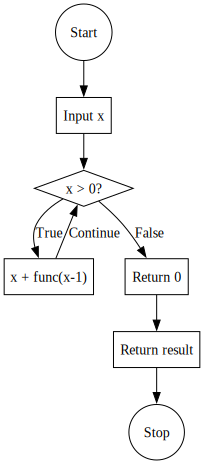

In [10]:
import graphviz
model = genai.GenerativeModel('gemini-pro')
Code_Snippet = f"""
def func(x):
    if x > 0:
        return x + func(x-1)
    return 0

result = func(5)
print(result)
"""

python_code_example = """
----------------------------
Example 1: Code Snippet
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

arr = [64, 34, 25, 12, 22, 11, 90]
sorted_arr = bubble_sort(arr)
print(sorted_arr)

dot code: 
digraph G {
    node [shape=box];
    
    start [label="Start", shape=circle];
    input [label="Input Array", shape=box];
    outer_loop [label="For i in range(n)", shape=box];
    inner_loop [label="For j in range(n-i-1)", shape=box];
    comparison [label="arr[j] > arr[j+1]?", shape=diamond];
    swap [label="Swap arr[j] and arr[j+1]", shape=box];
    end_inner_loop [label="End Inner Loop", shape=box];
    end_outer_loop [label="End Outer Loop", shape=box];
    return [label="Return Sorted Array", shape=box];
    stop [label="Stop", shape=circle];
    
    start -> input;
    input -> outer_loop;
    outer_loop -> inner_loop;
    inner_loop -> comparison;
    comparison -> swap [label="True"];
    swap -> end_inner_loop;
    comparison -> end_inner_loop [label="False"];
    end_inner_loop -> inner_loop [label="Continue Inner Loop"];
    end_inner_loop -> end_outer_loop [label="End Inner Loop"];
    end_outer_loop -> outer_loop [label="Continue Outer Loop"];
    outer_loop -> return [label="End Outer Loop"];
    return -> stop;
}


-----------------------------

Example 2: Code Snippet
def find_prime_numbers(n):
    primes = []
    for num in range(2, n+1):
        is_prime = True
        for j in range(2, int(num ** 0.5) + 1):
            if num % j == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
    return primes

n = 20
prime_numbers = find_prime_numbers(n)
print(prime_numbers)

dot code:
digraph G {
    node [shape=box];

    start [label="Start", shape=circle];
    input [label="Input n", shape=box];
    init_primes [label="Initialize primes list", shape=box];
    outer_loop [label="For num in range(2, n+1)", shape=box];
    init_is_prime [label="Set is_prime = True", shape=box];
    inner_loop [label="For i in range(2, sqrt(num)+1)", shape=box];
    check_divisible [label="num % j == 0?", shape=diamond];
    set_not_prime [label="Set is_prime = False", shape=box];
    end_inner_loop [label="End Inner Loop", shape=box];
    append_prime [label="Append num to primes", shape=box];
    end_outer_loop [label="End Outer Loop", shape=box];
    return [label="Return primes list", shape=box];
    stop [label="Stop", shape=circle];

    start -> input;
    input -> init_primes;
    init_primes -> outer_loop;
    outer_loop -> init_is_prime;
    init_is_prime -> inner_loop;
    inner_loop -> check_divisible;
    check_divisible -> set_not_prime [label="True"];
    set_not_prime -> end_inner_loop;
    check_divisible -> end_inner_loop [label="False"];
    end_inner_loop -> outer_loop [label="Continue Outer Loop"];
    end_inner_loop -> append_prime [label="is_prime is True"];
    append_prime -> end_outer_loop;
    end_outer_loop -> return;
    return -> stop;
}

------------------------------
"""

prompt = f"""
Your Task is to act as generater of a dot code for graphiz to generate flowchart.
I'll give you a Code Snippet.
Your Job is to generate a dot code for graphiz to generate flowchart
Few good examples of python code output between #### seperator:
####
{python_code_example}
####
Code Snippet is shared below, delimited with triple backticks:
```
  {Code_Snippet}
```
"""
completions = model.generate_content(prompt)

with open("mygraph.dot", "w") as f:
    # Write the DOT graph definition
    f.write(completions.text)

with open('mygraph.dot', 'r') as fr:
    lines = fr.readlines()
    with open('mygraph.dot', 'w') as fw:
        for line in lines:
            if line.strip('\n') != "```":
                fw.write(line)


# Read the DOT file
dot_graph = graphviz.Source.from_file('mygraph.dot')

# Render the graph
v=dot_graph
v